<a href="https://colab.research.google.com/github/uditsaini1111/unsupervised_/blob/main/k_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [ ]:
df=pd.read_csv('/content/dfdf.df, encoding='latin1dfdf

In [ ]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [ ]:
df.shape

(541909, 8)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df[df['Quantity']<0].index

Index([   141,    154,    235,    236,    237,    238,    239,    240,    241,
          939,
       ...
       540141, 540142, 540176, 540422, 540448, 540449, 541541, 541715, 541716,
       541717],
      dtype='int64', length=8905)

In [ ]:
df.loc[df['Quantity'] < 0, 'Quantity'] = 0

In [ ]:
df[df['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [ ]:
df.shape

(406829, 8)

In [ ]:
df['Sales'] = df['Quantity'] * df['UnitPrice']
df1 = df.groupby('CustomerID')['Sales'].sum()


In [ ]:
df1.reset_index()

,CustomerID,Sales
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4367,18280.0,180.60
4368,18281.0,80.82
4369,18282.0,178.05
4370,18283.0,2094.88


In [ ]:
df2 = df.groupby('CustomerID')['InvoiceNo'].count().reset_index()
df2

,CustomerID,InvoiceNo
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
...,...,...
4367,18280.0,10
4368,18281.0,7
4369,18282.0,13
4370,18283.0,756


In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Last Transaction'] = (df['InvoiceDate'].max() - df['InvoiceDate']).dt.days
#df['Last Transaction'] = (pd.Timestamp.now() - df['InvoiceDate']).dt.days

In [ ]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,Last Transaction
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,0
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,0
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,0
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,0


In [ ]:
pd.Timestamp.now()

Timestamp('2025-08-09 15:25:33.451994')

In [ ]:
df3=df.groupby(['CustomerID', 'Country'])['Last Transaction'].max().reset_index()

In [ ]:
df3

,CustomerID,Country,Last Transaction
0,12346.0,United Kingdom,325
1,12347.0,Iceland,366
2,12348.0,Finland,357
3,12349.0,Italy,18
4,12350.0,Norway,309
...,...,...,...
4375,18280.0,United Kingdom,277
4376,18281.0,United Kingdom,180
4377,18282.0,United Kingdom,125
4378,18283.0,United Kingdom,336


In [ ]:
df4= pd.merge(df3, df2, how='inner', on='CustomerID')
df5= pd.merge(df4, df1, how='inner', on='CustomerID')

In [ ]:
df4

,CustomerID,Country,Last Transaction,InvoiceNo
0,12346.0,United Kingdom,325,2
1,12347.0,Iceland,366,182
2,12348.0,Finland,357,31
3,12349.0,Italy,18,73
4,12350.0,Norway,309,17
...,...,...,...,...
4375,18280.0,United Kingdom,277,10
4376,18281.0,United Kingdom,180,7
4377,18282.0,United Kingdom,125,13
4378,18283.0,United Kingdom,336,756


In [ ]:
df5

,CustomerID,Country,Last Transaction,InvoiceNo,Sales
0,12346.0,United Kingdom,325,2,77183.60
1,12347.0,Iceland,366,182,4310.00
2,12348.0,Finland,357,31,1797.24
3,12349.0,Italy,18,73,1757.55
4,12350.0,Norway,309,17,334.40
...,...,...,...,...,...
4375,18280.0,United Kingdom,277,10,180.60
4376,18281.0,United Kingdom,180,7,80.82
4377,18282.0,United Kingdom,125,13,178.05
4378,18283.0,United Kingdom,336,756,2094.88


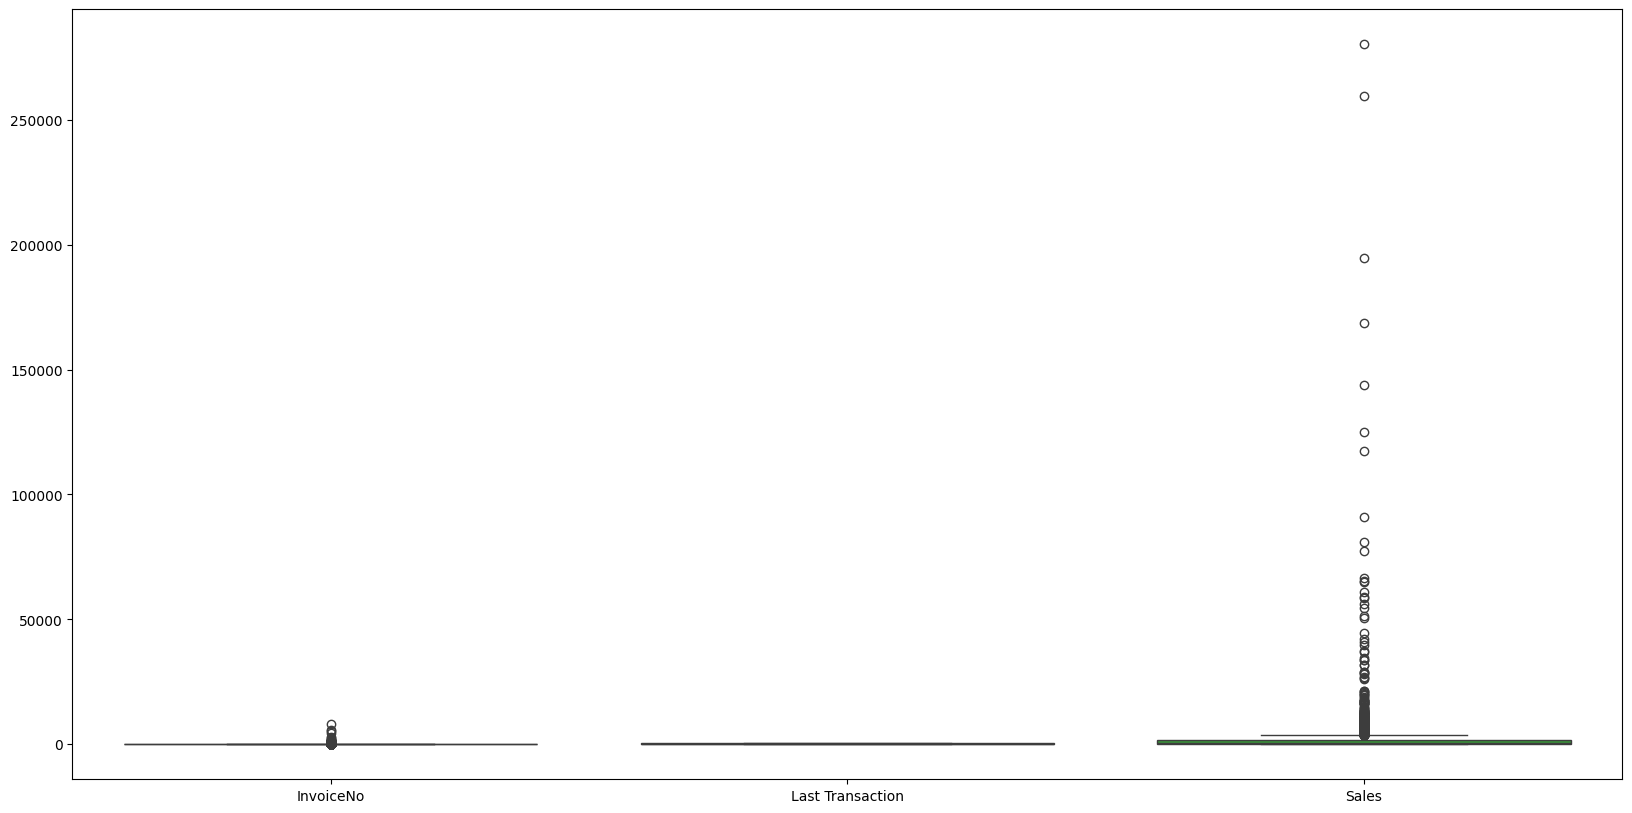

In [ ]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=df5[['InvoiceNo', 'Last Transaction', 'Sales']])
plt.show()

In [ ]:
IQR = df5['Sales'].quantile(0.75) - df5['Sales'].quantile(0.25)
lower_limit = df5['Sales'].quantile(0.25) - 1.5 * IQR
upper_limit = df5['Sales'].quantile(0.75) + 1.5 * IQR
df6= df5[(df5['Sales'] < upper_limit) & (df5['Sales'] > lower_limit)]

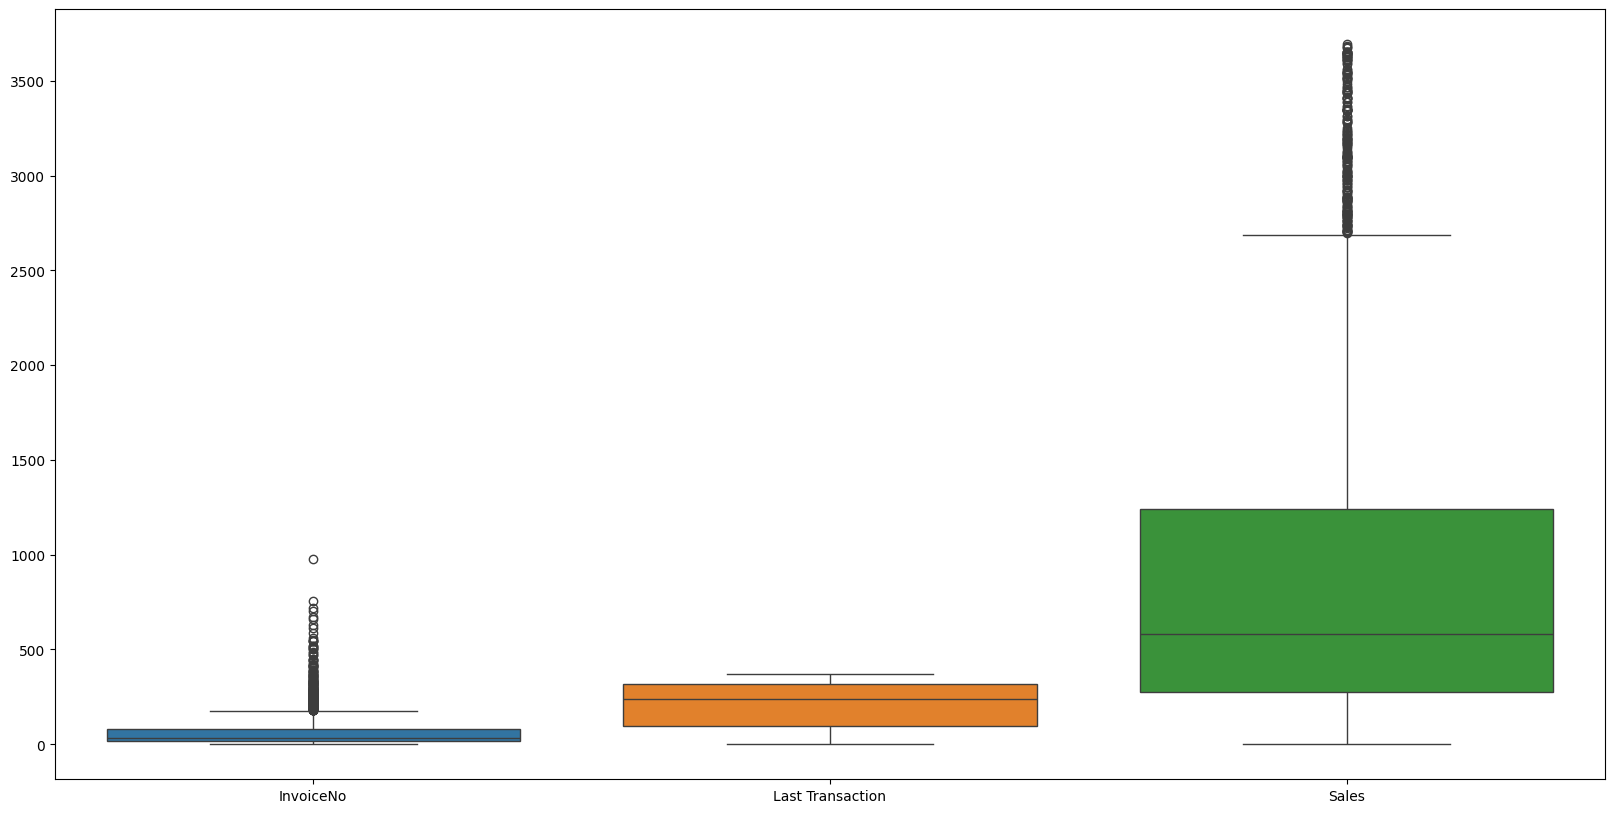

In [ ]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=df6[['InvoiceNo', 'Last Transaction', 'Sales']])
plt.show()

In [ ]:
df6.reset_index(drop=True, inplace=True)

In [ ]:
df6

,CustomerID,Country,Last Transaction,InvoiceNo,Sales
0,12348.0,Finland,357,31,1797.24
1,12349.0,Italy,18,73,1757.55
2,12350.0,Norway,309,17,334.40
3,12352.0,Norway,296,95,2506.04
4,12353.0,Bahrain,203,4,89.00
...,...,...,...,...,...
3946,18280.0,United Kingdom,277,10,180.60
3947,18281.0,United Kingdom,180,7,80.82
3948,18282.0,United Kingdom,125,13,178.05
3949,18283.0,United Kingdom,336,756,2094.88


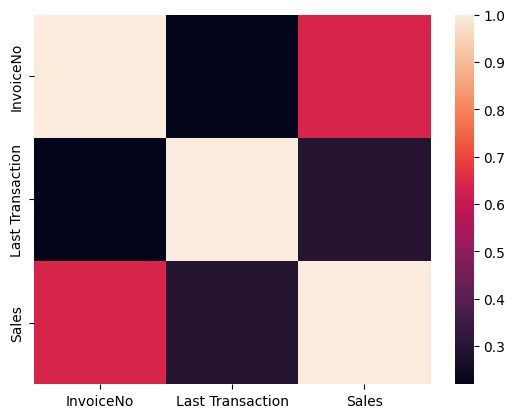

In [ ]:
plt.figure9figsize=(20, 10)
sns.heatmap(data=df6[['InvoiceNo', 'Last Transaction', 'Sales']].corr())
plt.show()

In [ ]:
#
from sklearn.preprocessing import StandardScaler
df8= df7[['Last Transaction','InvoiceNo','Sales']]
scaler = StandardScaler()

df9 = scaler.fit_transform(df8)
df11 = pd.DataFrame(df9)
df11.columns = ['Last Transaction','InvoiceNo','Sales']



In [ ]:
df11

,Last Transaction,InvoiceNo,Sales
0,1.216769,-0.400518,1.101903
1,-1.668020,0.138821,1.054157
2,0.808303,-0.580298,-0.657835
3,0.697677,0.421332,1.954561
4,-0.093725,-0.747236,-0.953041
...,...,...,...
3946,0.535993,-0.670188,-0.842850
3947,-0.289448,-0.708712,-0.962881
3948,-0.757482,-0.631664,-0.845918
3949,1.038065,8.909506,1.459952


In [ ]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()

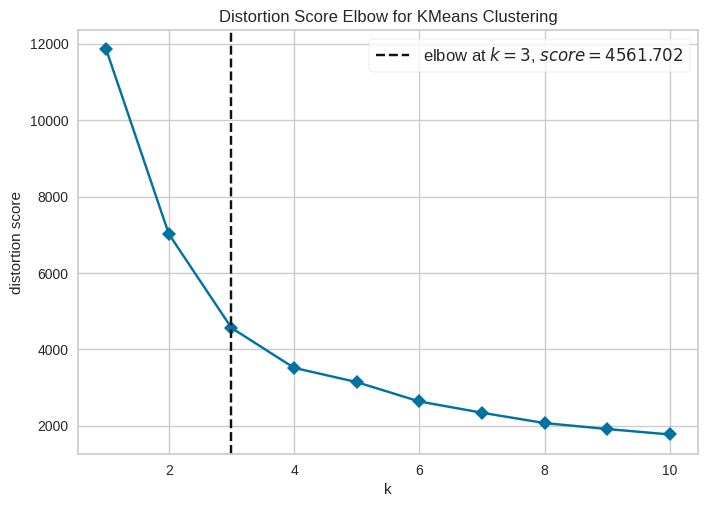

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
visualizer = KElbowVisualizer(model, k=(1,11),timings=False)
visualizer.fit(df11)
visualizer.show()

In [ ]:
model1= KMeans(n_clusters=3)
p=model1.fit_predict(df11)

In [ ]:
p

array([0, 2, 0, ..., 2, 1, 1], dtype=int32)

In [ ]:
model1.labels_

array([0, 2, 0, ..., 2, 1, 1], dtype=int32)

In [ ]:
df11['Cluster']=p

In [ ]:
df11

,Last Transaction,InvoiceNo,Sales,Cluster,clusters_hierarchial
0,1.216769,-0.400518,1.101903,0,0
1,-1.668020,0.138821,1.054157,2,0
2,0.808303,-0.580298,-0.657835,0,0
3,0.697677,0.421332,1.954561,1,1
4,-0.093725,-0.747236,-0.953041,0,0
...,...,...,...,...,...
3946,0.535993,-0.670188,-0.842850,0,0
3947,-0.289448,-0.708712,-0.962881,2,0
3948,-0.757482,-0.631664,-0.845918,2,0
3949,1.038065,8.909506,1.459952,1,1


In [ ]:
model1.cluster_centers_

array([[ 6.75160158e-01, -3.03744234e-01, -3.27494937e-01,
         1.59872116e-14,  6.18949336e-15],
       [ 6.00330351e-01,  1.40402830e+00,  1.68256053e+00,
         2.00000000e+00,  1.00000000e+00],
       [-1.11257729e+00, -3.51991528e-01, -4.65447555e-01,
         1.00000000e+00,  1.88737914e-15]])

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
score = silhouette_score(df11, model1.labels_, metric='euclidean')
print(score)

0.5116968215190115


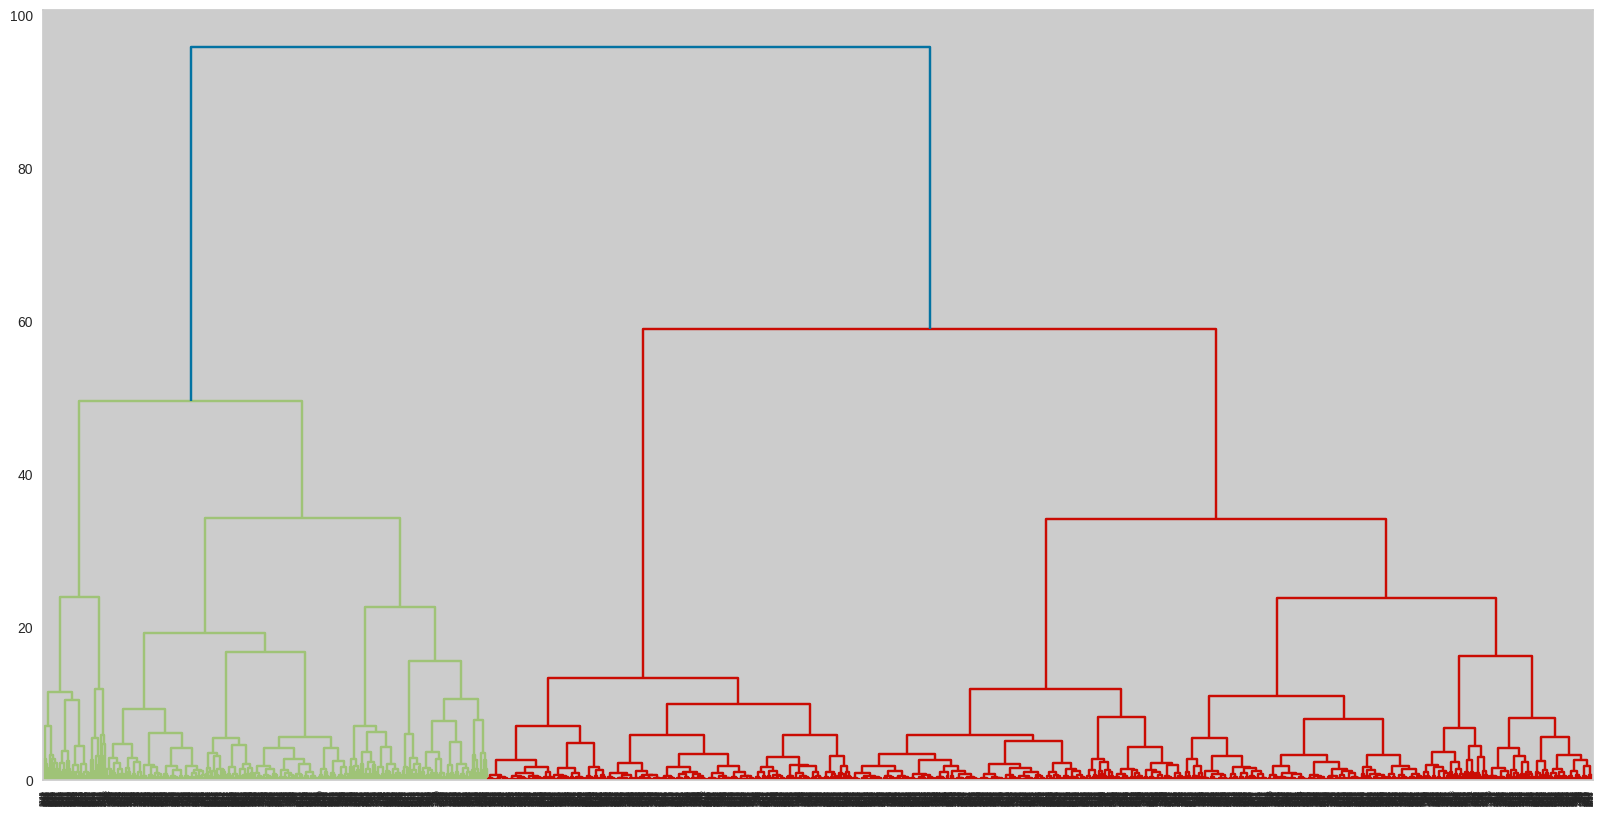

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
plt.figure(figsize=(20,10))

z=linkage(df9, method='ward')#use after standardization df9
dendrogram(z)
plt.show()


In [ ]:
from sklearn.cluster import AgglomerativeClustering
model2= AgglomerativeClustering(n_clusters=4)
p1 = model2.fit_predict(df11)
df11['clusters_hierarchial']= p1

In [ ]:
p1

array([3, 1, 2, ..., 1, 0, 0])

In [ ]:
df11

,Last Transaction,InvoiceNo,Sales,Cluster,clusters_hierarchial
0,1.216769,-0.400518,1.101903,0,3
1,-1.668020,0.138821,1.054157,2,1
2,0.808303,-0.580298,-0.657835,0,2
3,0.697677,0.421332,1.954561,1,0
4,-0.093725,-0.747236,-0.953041,0,2
...,...,...,...,...,...
3946,0.535993,-0.670188,-0.842850,0,2
3947,-0.289448,-0.708712,-0.962881,2,1
3948,-0.757482,-0.631664,-0.845918,2,1
3949,1.038065,8.909506,1.459952,1,0


In [ ]:

score = silhouette_score(df11, model2.labels_, metric='euclidean')
print(score)

0.551779627689548


In [ ]:
from sklearn.cluster import DBSCAN
model3 = DBSCAN(eps=0.2,min_samples = 4 )
p2= model3.fit_predict(df11)
df11['clusters_dbscan'] = p2
df11

,Last Transaction,InvoiceNo,Sales,Cluster,clusters_hierarchial,clusters_dbscan
0,1.216769,-0.400518,1.101903,0,3,0
1,-1.668020,0.138821,1.054157,2,1,-1
2,0.808303,-0.580298,-0.657835,0,2,1
3,0.697677,0.421332,1.954561,1,0,6
4,-0.093725,-0.747236,-0.953041,0,2,1
...,...,...,...,...,...,...
3946,0.535993,-0.670188,-0.842850,0,2,1
3947,-0.289448,-0.708712,-0.962881,2,1,3
3948,-0.757482,-0.631664,-0.845918,2,1,3
3949,1.038065,8.909506,1.459952,1,0,-1


In [ ]:
score = silhouette_score(df11, model3.labels_, metric='euclidean')
print(score)

0.5983746636041348
